<a href="https://colab.research.google.com/github/Sri-harsha99/Australian-Weather-EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis on Australian Weather data

Imported all necessary packages reguired

In [ ]:
import pandas as pd
import os
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from tensorflow import keras
from collections import Counter
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, classification_report, roc_auc_score

Loaded the weather data csv file into a pandas dataframe

In [ ]:
data = '/content/drive/My Drive/weatherAUS.csv'
df = pd.read_csv(data)

Shape of pandas dataframe. (145460, 23) implies that there are 145460 rows of data and 23 columns 

In [ ]:
df.shape

(145460, 23)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

info() function helps us to find if there are any null values in columns. We can observe that Sunshine, Evaporation, cloud9am, cloud3pm columns have almost half of values empty. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


There are three types of values for RainTomorrow. 'No' signifies no rain tomorrow, 'Yes' means rain tomorrow. 'nan' is not an number, we can drop the rows that has 'nan'.

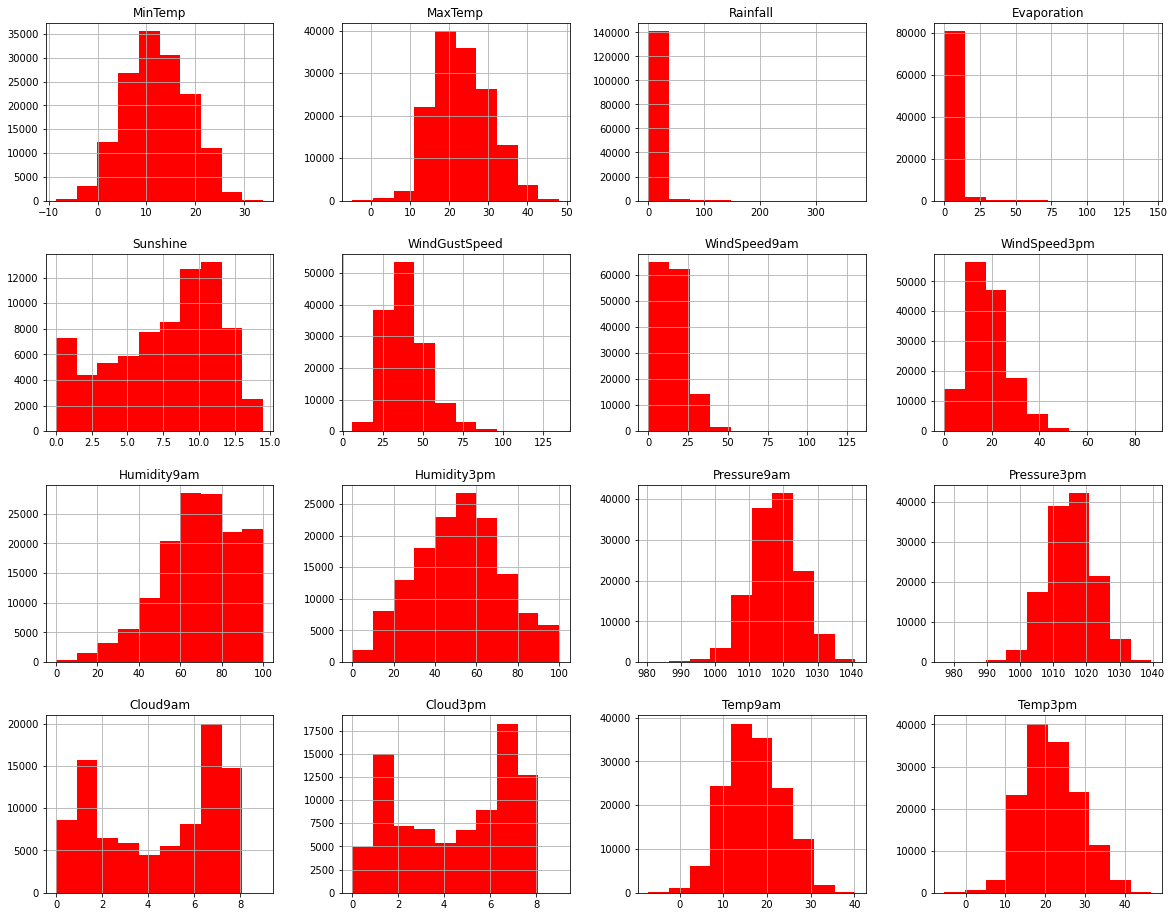

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(20,16), color = 'r');
plt.show();

In [ ]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df['RainTomorrow'].isnull().sum()

3267

In [ ]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

Below columns have categorical values. So, choosing mean of their values doesn't make sense, instead, we will fill the empty values with thier mode. 

In [ ]:
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] =df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

Mapping RainToday and RainTomorrow columns with 1 and 0.

In [ ]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

LabelEncoder is used to transform non-numerical labels into numerical values. We are doing one-hot encoding here.

In [ ]:
le = preprocessing.LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])

Below plot shows correlation between columns. If value between two columns is 1 then, the two columns are highly dependent on each other. We can observe that MinTemp, MaxTemp, Temp9AM, Temp3pm are highly correlated. This also makes sense since, if temperature is high at 9AM, then in most cases it will be high at 3PM also.

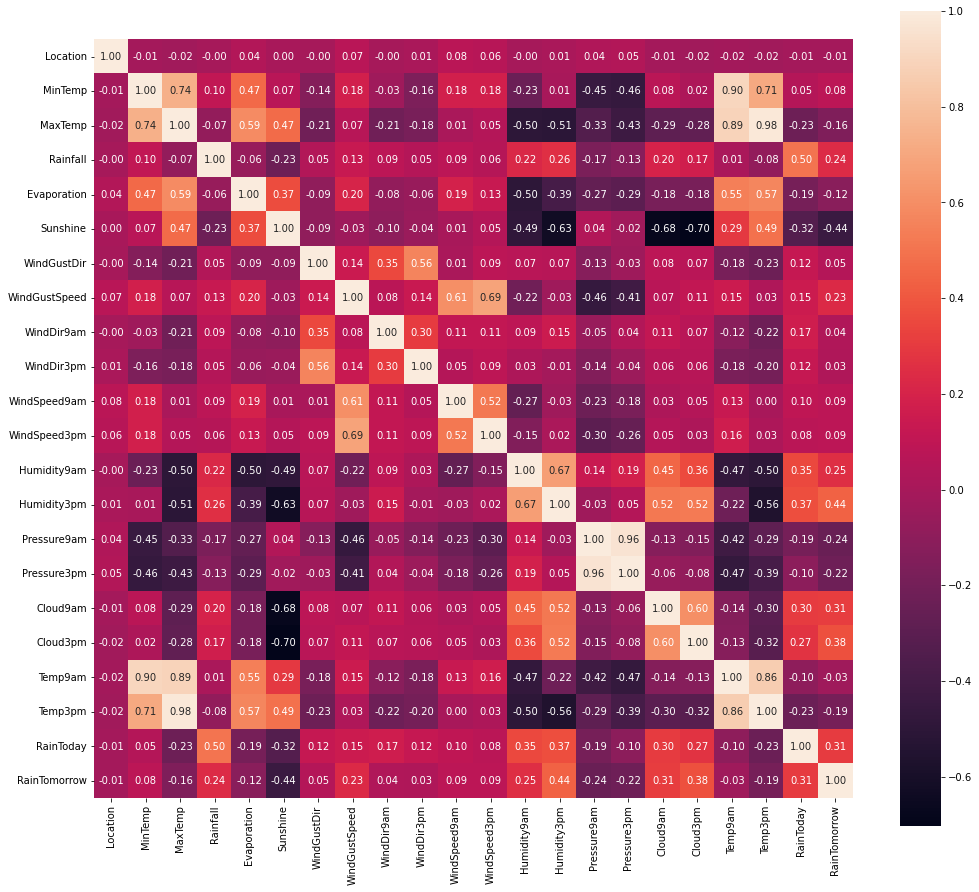

In [ ]:
plt.figure(figsize=(17,15))
ax = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

As 'Temp9am' and 'Temp3pm' have high correlation with min and max temperature coulmns, we can drop these columns safely

In [ ]:
df=df.drop(['Temp3pm','Temp9am'],axis=1)

The below plot shows where data is missing. White space means data is not present.

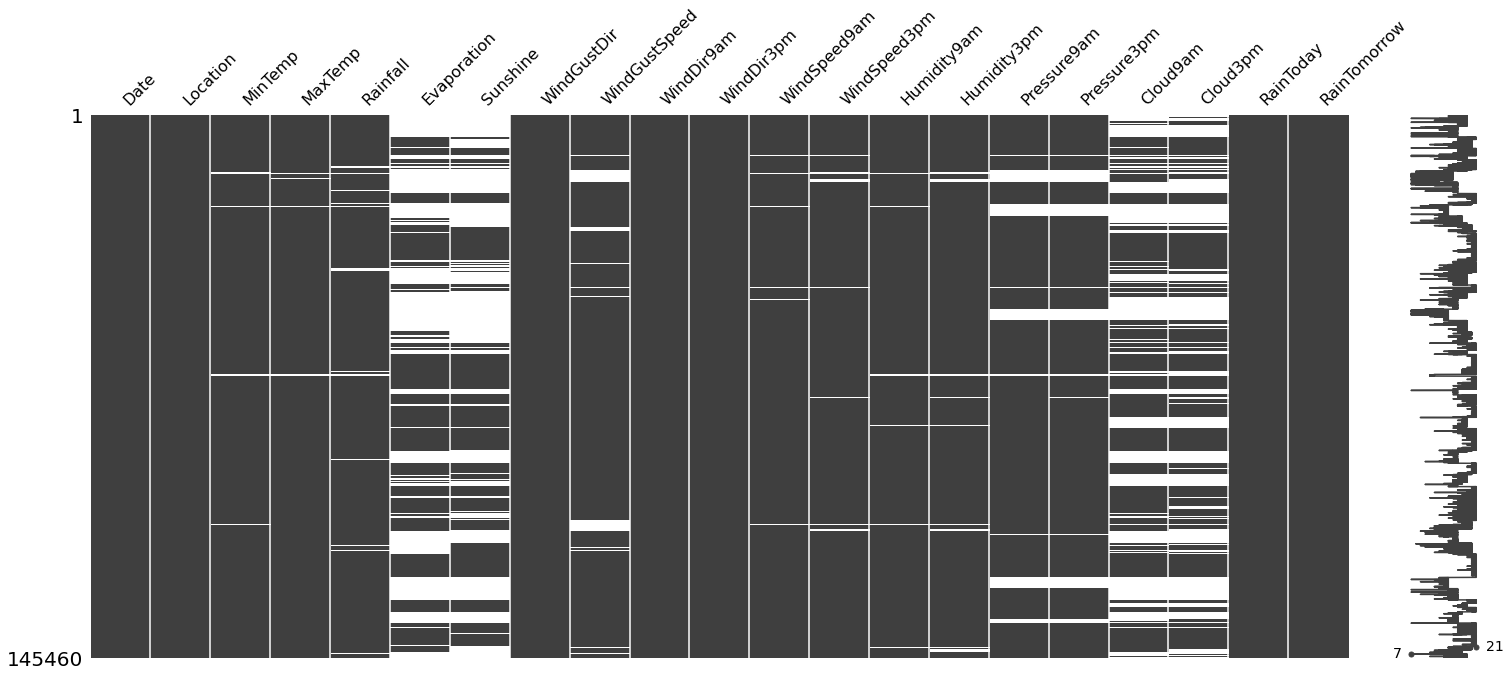

In [ ]:
msno.matrix(df)

Below columns have empty values, so I'm filling all empty values with their column's mean value. All the columns below have are numerical values, so choosing mean of thier values is useful.

In [ ]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].rolling(30,center=True,min_periods=1).mean())
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].rolling(30,center=True,min_periods=1).mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].rolling(30,center=True,min_periods=1).mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].rolling(30,center=True,min_periods=1).mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].rolling(30,center=True,min_periods=1).mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].rolling(30,center=True,min_periods=1).mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].rolling(30,center=True,min_periods=1).mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].rolling(30,center=True,min_periods=1).mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].rolling(30,center=True,min_periods=1).mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].rolling(30,center=True,min_periods=1).mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].rolling(30,center=True,min_periods=1).mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].rolling(30,center=True,min_periods=1).mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].rolling(30,center=True,min_periods=1).mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].rolling(30,center=True,min_periods=1).mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

In [ ]:
(df.isnull().sum()/len(df))*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

Below I'm changing the date field from a string to 3 columns of interger fields(year,month,date), so the algorithms can better work with the data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [ ]:
df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [ ]:
df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

Dropped the date column since, we have added 3 new columns for date, month and year.

In [ ]:
df.drop('Date', axis=1, inplace = True)

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,13.4,0.6,5.598683,7.620742,13,44.0,13,14,...,22.0,1007.7,1007.1,8.000000,6.6,0,0,2008,12,1
1,2,7.4,7.4,0.0,5.598683,7.620742,14,44.0,6,15,...,25.0,1010.6,1007.8,5.333333,6.6,0,0,2008,12,2
2,2,12.9,12.9,0.0,5.598683,7.620742,15,46.0,13,15,...,30.0,1007.6,1008.7,5.714286,2.0,0,0,2008,12,3
3,2,9.2,9.2,0.0,5.598683,7.620742,4,24.0,9,0,...,16.0,1017.6,1012.8,6.000000,5.0,0,0,2008,12,4
4,2,17.5,17.5,1.0,5.598683,7.620742,13,41.0,1,7,...,33.0,1010.8,1006.0,7.000000,8.0,0,0,2008,12,5


In [ ]:
df['RainTomorrow'].unique()

array([0, 1])

After data manipulation, there are no null values in RainTomorrow column

In [ ]:
df['RainTomorrow'].isnull().sum()

0

Below plot shows that around on 30% of days recorded rain has been recorded

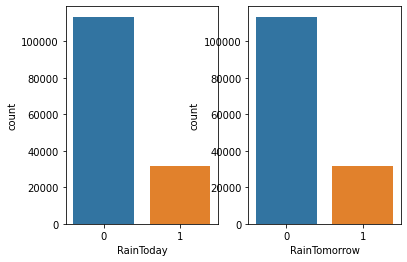

<Figure size 2160x5760 with 0 Axes>

In [ ]:
fig, ax =plt.subplots(1,2)

plt.figure(figsize=(30,80))
sns.countplot(data=df,x='RainToday',ax=ax[0])
sns.countplot(data=df,x='RainTomorrow',ax=ax[1])

In [ ]:
cols = df.columns.tolist()

cols = cols[:-4] + cols[-3:0] + cols[-4:-3]
df = df[cols]

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,2,13.4,13.4,0.6,5.598683,7.620742,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,6.6,0,0
1,2,7.4,7.4,0.0,5.598683,7.620742,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,5.333333,6.6,0,0
2,2,12.9,12.9,0.0,5.598683,7.620742,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,5.714286,2.0,0,0
3,2,9.2,9.2,0.0,5.598683,7.620742,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,6.000000,5.0,0,0
4,2,17.5,17.5,1.0,5.598683,7.620742,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.0,0,0


In [ ]:
feature_names = df.columns[:-1]
feature_names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((116368, 19), (29092, 19))

Here, I'm doing feature scaling here, so helps to reduce the affect of outliers on the model and improves the accuracy.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Logistic Regression 
Maximum iterations = 800

In [ ]:
model = LogisticRegression(max_iter=800,penalty='l1', solver='saga')
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=800, penalty='l1', solver='saga')

In [ ]:
predicted=model.predict(x_train)
print ("The Training accuracy of Logistic Regression is : ", accuracy_score(y_train, predicted)*100, "%")

predicted=model.predict(x_test)
print ("The Testing accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

The Training accuracy of Logistic Regression is :  84.15715660662725 %
The Testing accuracy of Logistic Regression is :  84.02309913378248 %


In [ ]:
print(classification_report(y_test, predicted.round()))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22672
           1       0.71      0.46      0.56      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092



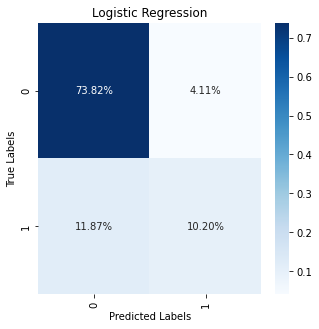

In [ ]:
conf = confusion_matrix(y_test, predicted)

plt.figure(figsize=(5,5))
ax = sns.heatmap(conf/np.sum(conf), annot=True, fmt='.2%', cmap='Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='Predicted Labels', ylabel='True Labels')
plt.title("Logistic Regression")
plt.show()

# Gaussian Naive Bayes Classifier

In [ ]:
model1 = GaussianNB()
model1.fit(x_train, y_train)
predicted = model1.predict(x_test)

In [ ]:
predicted=model1.predict(x_train)
print ("The Training accuracy of Gaussian Naive Bayes Classifier is : ", accuracy_score(y_train, predicted)*100, "%")

predicted=model1.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("The Testing accuracy of Gaussian Naive Bayes Classifier is : ", accuracy_score(y_test, predicted)*100, "%")

The Training accuracy of Gaussian Naive Bayes Classifier is :  80.94493331500068 %
The Testing accuracy of Gaussian Naive Bayes Classifier is :  80.82290664100096 %


In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     22672
           1       0.56      0.58      0.57      6420

    accuracy                           0.81     29092
   macro avg       0.72      0.73      0.72     29092
weighted avg       0.81      0.81      0.81     29092



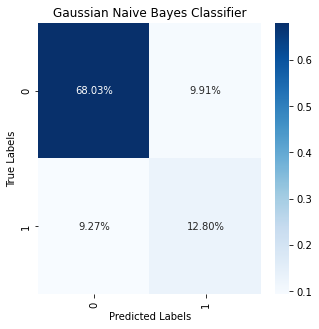

In [ ]:
conf = confusion_matrix(y_test, predicted)

plt.figure(figsize=(5,5))
ax = sns.heatmap(conf/np.sum(conf), annot=True, fmt='.2%', cmap='Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='Predicted Labels', ylabel='True Labels')
plt.title("Gaussian Naive Bayes Classifier")
plt.show()

# Bernoulli Naive Bayes Classifier

In [ ]:
model2 = BernoulliNB()
model2.fit(x_train, y_train)

BernoulliNB()

In [ ]:
predicted=model2.predict(x_train)
print ("The Training accuracy of Bernoulli Naive Bayes Classifier is : ", accuracy_score(y_train, predicted)*100, "%")

predicted=model2.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("The Testing accuracy of Bernoulli Naive Bayes Classifier is : ", accuracy_score(y_test, predicted)*100, "%")

The Training accuracy of Bernoulli Naive Bayes Classifier is :  76.55111370823595 %
The Testing accuracy of Bernoulli Naive Bayes Classifier is :  76.56400384985564 %


In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     22672
           1       0.47      0.45      0.46      6420

    accuracy                           0.77     29092
   macro avg       0.66      0.65      0.66     29092
weighted avg       0.76      0.77      0.76     29092



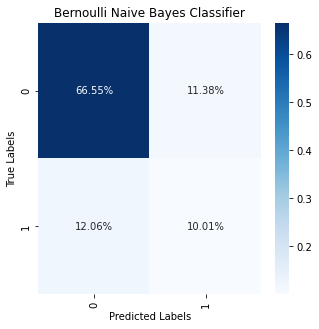

In [ ]:
conf = confusion_matrix(y_test, predicted)

plt.figure(figsize=(5,5))
ax = sns.heatmap(conf/np.sum(conf), annot=True, fmt='.2%', cmap='Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='Predicted Labels', ylabel='True Labels')
plt.title("Bernoulli Naive Bayes Classifier")
plt.show()

# Random Forest Classifer

In [ ]:
model3 = RandomForestClassifier(n_estimators = 500, random_state = 0)  
model3.fit(x_train, y_train)  
predicted = model3.predict(x_test)

In [ ]:
predicted=model3.predict(x_train)
print ("The Training accuracy of Random forest Classifier is : ", accuracy_score(y_train, predicted.round())*100, "%")

predicted=model3.predict(x_test)
print ("The Testing accuracy of Random forest Classifier is : ", accuracy_score(y_test, predicted.round())*100, "%")

The Training accuracy of Random forest Classifier is :  100.0 %
The Testing accuracy of Random forest Classifier is :  85.24680324487832 %


In [ ]:
print(classification_report(y_test, predicted.round()))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22672
           1       0.75      0.49      0.60      6420

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



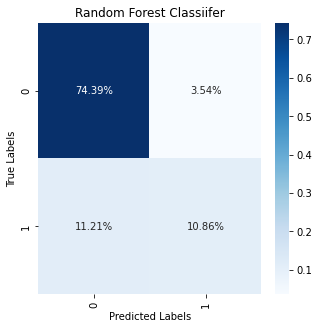

In [ ]:
conf = confusion_matrix(y_test, predicted.round())

plt.figure(figsize=(5,5))
ax = sns.heatmap(conf/np.sum(conf), annot=True, fmt='.2%', cmap='Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='Predicted Labels', ylabel='True Labels')
plt.title("Random Forest Classiifer")
plt.show()

# K Nearest Neighbhors classifier 
K value as 3

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(x_train, y_train)
predicted = neigh.predict(x_test)

In [ ]:
predicted= neigh.predict(x_train)
print ("The Training accuracy of K Nearest Neighbhor is : ", accuracy_score(y_train, predicted.round())*100, "%")

predicted= neigh.predict(x_test)
print ("The Testing accuracy of K Nearest Neighbhor is : ", accuracy_score(y_test, predicted.round())*100, "%")

The Training accuracy of K Nearest Neighbhor is :  86.46449195655163 %
The Testing accuracy of K Nearest Neighbhor is :  84.13996975113433 %


In [ ]:
print(classification_report(y_test, predicted.round()))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     22672
           1       0.75      0.42      0.54      6420

    accuracy                           0.84     29092
   macro avg       0.80      0.69      0.72     29092
weighted avg       0.83      0.84      0.82     29092



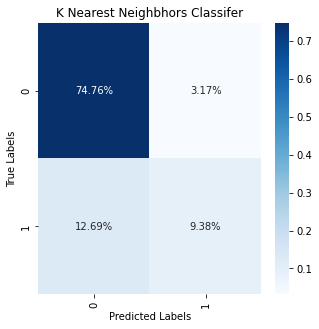

In [ ]:
conf = confusion_matrix(y_test, predicted.round())

plt.figure(figsize=(5,5))
ax = sns.heatmap(conf/np.sum(conf), annot=True, fmt='.2%', cmap='Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='Predicted Labels', ylabel='True Labels')
plt.title("K Nearest Neighbhors Classifer")
plt.show()

# Desicion Tree Classifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=10, criterion='gini')
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
predicted = clf.predict(x_train)
print ("The Training accuracy of Decision Tree Classifier is : ", accuracy_score(y_train, predicted)*100, "%")

predicted = clf.predict(x_test)
print ("The Training accuracy of Decision Tree Classifier is : ", accuracy_score(y_test, predicted)*100, "%")

The Training accuracy of Decision Tree Classifier is :  86.35449608139695 %
The Training accuracy of Decision Tree Classifier is :  83.65530042623402 %


In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     22672
           1       0.68      0.49      0.57      6420

    accuracy                           0.84     29092
   macro avg       0.77      0.71      0.73     29092
weighted avg       0.82      0.84      0.83     29092



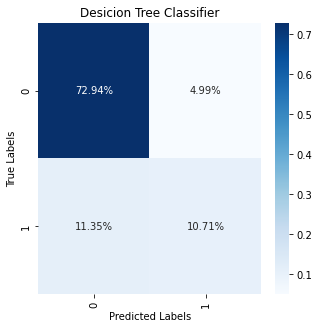

In [ ]:
conf = confusion_matrix(y_test, predicted)

plt.figure(figsize=(5,5))
ax = sns.heatmap(conf/np.sum(conf), annot=True, fmt='.2%', cmap='Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='Predicted Labels', ylabel='True Labels')
plt.title("Desicion Tree Classifier")
plt.show()

In [ ]:
from sklearn.tree import export_text
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(feature_names))
#print the result
print(tree_rules)

|--- Humidity3pm <= 71.02
|   |--- Humidity3pm <= 51.20
|   |   |--- WindGustSpeed <= 53.86
|   |   |   |--- Sunshine <= 7.54
|   |   |   |   |--- Pressure3pm <= 1014.55
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pressure3pm >  1014.55
|   |   |   |   |   |--- class: 0
|   |   |   |--- Sunshine >  7.54
|   |   |   |   |--- Pressure3pm <= 1010.44
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pressure3pm >  1010.44
|   |   |   |   |   |--- class: 0
|   |   |--- WindGustSpeed >  53.86
|   |   |   |--- Sunshine <= 7.52
|   |   |   |   |--- Pressure3pm <= 1005.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Pressure3pm >  1005.95
|   |   |   |   |   |--- class: 0
|   |   |   |--- Sunshine >  7.52
|   |   |   |   |--- WindDir3pm <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- WindDir3pm >  7.50
|   |   |   |   |   |--- class: 0
|   |--- Humidity3pm >  51.20
|   |   |--- WindGustSpeed <= 49.58
|   |   |   |--- Rainfall <= 2.92
|   |   |   |   |---

# Support Vector Machine

In [ ]:
clf_svc = svm.SVC(kernel='linear')
clf_svc.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
predicted=model.predict(x_train)
print ("The Training accuracy of Support Vector Machine is : ", accuracy_score(y_train,predicted.round())*100, "%")

predicted=model.predict(x_test)
print ("The Testing accuracy of Support Vector Machine is : ", accuracy_score(y_test, predicted.round())*100, "%")

The Training accuracy of Support Vector Machine is :  84.15715660662725 %
The Testing accuracy of Support Vector Machine is :  84.02309913378248 %


In [ ]:
print(classification_report(y_test, predicted.round()))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22672
           1       0.71      0.46      0.56      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092



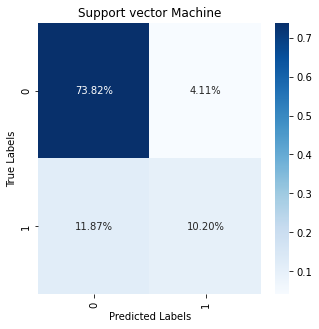

In [ ]:
conf = confusion_matrix(y_test, predicted.round())

plt.figure(figsize=(5,5))
ax = sns.heatmap(conf/np.sum(conf), annot=True, fmt='.2%', cmap='Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='Predicted Labels', ylabel='True Labels')
plt.title("Support vector Machine")
plt.show()

# Neural Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

neuralModel = Sequential()
neuralModel.add(Dense(1024, input_dim= 19, activation='relu'))
neuralModel.add(Dense(712, activation='relu'))
neuralModel.add(Dense(1, activation='sigmoid'))

early_stopping = keras.callbacks.EarlyStopping( patience = 12, min_delta = 0.001,
                                               restore_best_weights =True )

neuralModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

history = neuralModel.fit(x_train, y_train, epochs=30, batch_size=100, 
                     validation_data=(x_test, y_test),
                    verbose=1)

scores = neuralModel.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (neuralModel.metrics_names[1], scores[1]*100))

Epoch 1/30
1164/1164 [==============================] - 21s 17ms/step - loss: 1.9354 - binary_accuracy: 0.7787 - val_loss: 0.3855 - val_binary_accuracy: 0.8346
Epoch 2/30
1164/1164 [==============================] - 24s 20ms/step - loss: 0.4256 - binary_accuracy: 0.8212 - val_loss: 0.4490 - val_binary_accuracy: 0.7970
Epoch 3/30
1164/1164 [==============================] - 20s 17ms/step - loss: 0.3899 - binary_accuracy: 0.8332 - val_loss: 0.3734 - val_binary_accuracy: 0.8371
Epoch 4/30
1164/1164 [==============================] - 20s 17ms/step - loss: 0.3813 - binary_accuracy: 0.8361 - val_loss: 0.3729 - val_binary_accuracy: 0.8385
Epoch 5/30
1164/1164 [==============================] - 22s 19ms/step - loss: 0.3768 - binary_accuracy: 0.8373 - val_loss: 0.3724 - val_binary_accuracy: 0.8379
Epoch 6/30
1164/1164 [==============================] - 20s 17ms/step - loss: 0.3749 - binary_accuracy: 0.8394 - val_loss: 0.3818 - val_binary_accuracy: 0.8342
Epoch 7/30
1164/1164 [==================

In [ ]:
print("The Training accuracy of Support Vector Machine is : " + str(neuralModel.evaluate(x_train, y_train)[1]))
print("The Training accuracy of Support Vector Machine is : " + str(neuralModel.evaluate(x_test, y_test)[1]))

3637/3637 [==============================] - 12s 3ms/step - loss: 0.3645 - binary_accuracy: 0.8437
The Training accuracy of Support Vector Machine is : 0.8436683416366577
910/910 [==============================] - 3s 3ms/step - loss: 0.3673 - binary_accuracy: 0.8398
The Training accuracy of Support Vector Machine is : 0.8398184776306152


In [ ]:
predictions =(neuralModel.predict(X_test)>0.5).astype("int32")

print(classification_report(y_test, predictions))

910/910 [==============================] - 7s 7ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22672
           1       0.22      1.00      0.36      6420

    accuracy                           0.22     29092
   macro avg       0.11      0.50      0.18     29092
weighted avg       0.05      0.22      0.08     29092



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


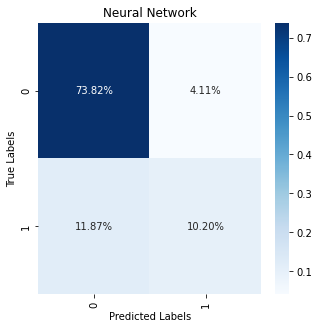

In [ ]:
conf = confusion_matrix(y_test, predicted.round())

plt.figure(figsize=(5,5))
ax = sns.heatmap(conf/np.sum(conf), annot=True, fmt='.2%', cmap='Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='Predicted Labels', ylabel='True Labels')
plt.title("Neural Network")
plt.show()

## Results

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes, scoring='roc_auc',
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    return plt

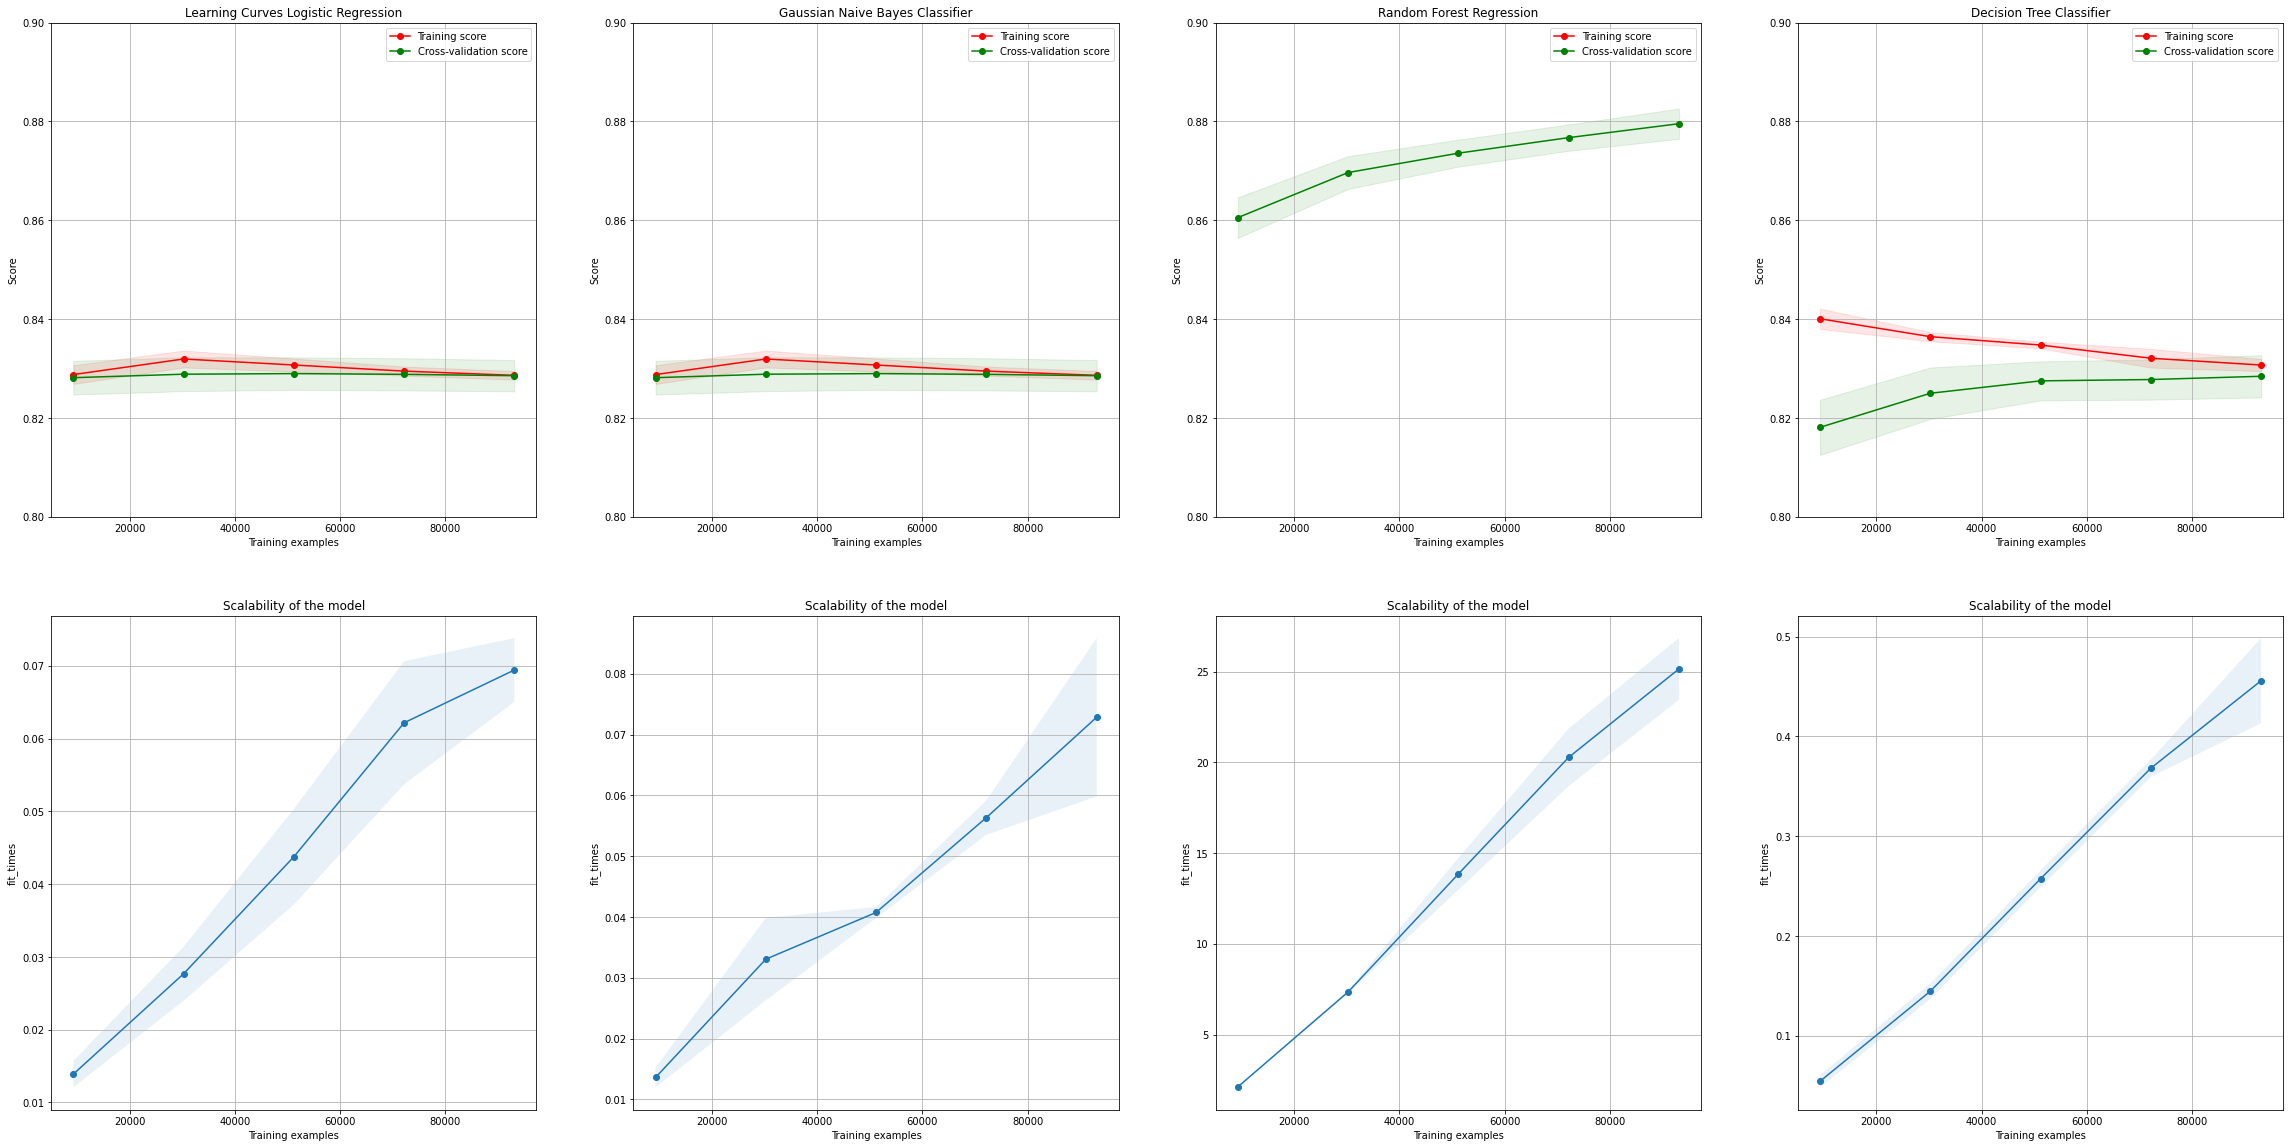

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(40, 20))

title = "Learning Curves Logistic Regression"
plot_learning_curve(model, title, x_train, y_train, axes=axes[:, 0], ylim=(0.8, 0.9), n_jobs=-1)

title = "Gaussian Naive Bayes Classifier"
plot_learning_curve(model1, title, x_train, y_train, axes=axes[:, 1], ylim=(0.8, 0.9), n_jobs=-1)

title = "Random Forest Regression"  
plot_learning_curve(model3, title, x_train, y_train, axes=axes[:, 2], ylim=(0.8, 0.9), n_jobs=-1)

title = "Decision Tree Classifier"
plot_learning_curve(clf, title, x_train, y_train, axes=axes[:, 3], ylim=(0.8, 0.9), n_jobs=-1)

plt.show()

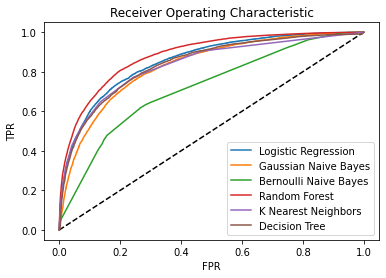

In [ ]:
y_pred_prob1 = model.predict_proba(x_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = model1.predict_proba(x_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = model2.predict_proba(x_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = model3.predict_proba(x_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

y_pred_prob5 = neigh.predict_proba(x_test)[:,1]
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)

y_pred_prob6 = clf.predict_proba(x_test)[:,1]
fpr6 , tpr6, thresholds6 = roc_curve(y_test, y_pred_prob6)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic Regression")
plt.plot(fpr2, tpr2, label= "Gaussian Naive Bayes")
plt.plot(fpr3, tpr3, label= "Bernoulli Naive Bayes")
plt.plot(fpr4, tpr4, label= "Random Forest")
plt.plot(fpr5, tpr5, label= "K Nearest Neighbors")
plt.plot(fpr6, tpr6, label= "Decision Tree")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()